# Naive Bayes Classifier

## Load data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
type(iris)

sklearn.utils.Bunch

In [ ]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
type(iris.data)

numpy.ndarray

In [ ]:
iris.data.shape

(150, 4)

In [ ]:
type(iris.target)

numpy.ndarray

In [ ]:
iris.target.shape

(150,)

In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

## Visualization

In [ ]:
df_x=pd.DataFrame(iris.data, columns = iris.feature_names)
df_y = pd.DataFrame(iris.target, columns=['Species'])

In [ ]:
df = pd.concat([df_x,df_y], axis=1)

In [ ]:
df

sepal length (cm)  sepal width (cm)  ...  petal width (cm)  Species
0                  5.1               3.5  ...               0.2        0
1                  4.9               3.0  ...               0.2        0
2                  4.7               3.2  ...               0.2        0
3                  4.6               3.1  ...               0.2        0
4                  5.0               3.6  ...               0.2        0
..                 ...               ...  ...               ...      ...
145                6.7               3.0  ...               2.3        2
146                6.3               2.5  ...               1.9        2
147                6.5               3.0  ...               2.0        2
148                6.2               3.4  ...               2.3        2
149                5.9               3.0  ...               1.8        2

[150 rows x 5 columns]

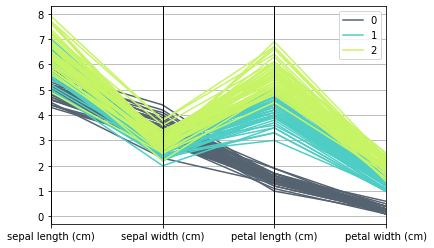

In [ ]:
pd.plotting.parallel_coordinates(df, 'Species', color=('#556270', '#4ECDC4', '#C7F464'))

## X-Y Preparation

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = 0.3, random_state = 48)

In [ ]:
x_train.shape

(105, 4)

In [ ]:
y_train.shape

(105,)

## Modelling (Gaussian Naive Bayes)

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train, y_train)

GaussianNB()

## Interpreting Gaussian Naive Bayes Results

In [ ]:
# calculate pooled standard deviation
std_pool = np.sqrt(gnb.class_prior_[1] * (gnb.sigma_[1, :]**2) + gnb.class_prior_[0]* (gnb.sigma_[0, :]**2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `sigma_` was deprecated in 1.0 and will be removed in1.2. Use `var_` instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
gnb.theta_[1,:]

array([5.928125, 2.775   , 4.21875 , 1.30625 ])

In [ ]:
gnb.theta_[0,:]

array([5.00512821, 3.44871795, 1.46666667, 0.24871795])

In [ ]:
# calculate standardized difference
delta = (gnb.theta_[1,:] - gnb.theta_[0,:]) / std_pool
delta_sorted = pd.Series(delta, index = iris.feature_names).sort_values()

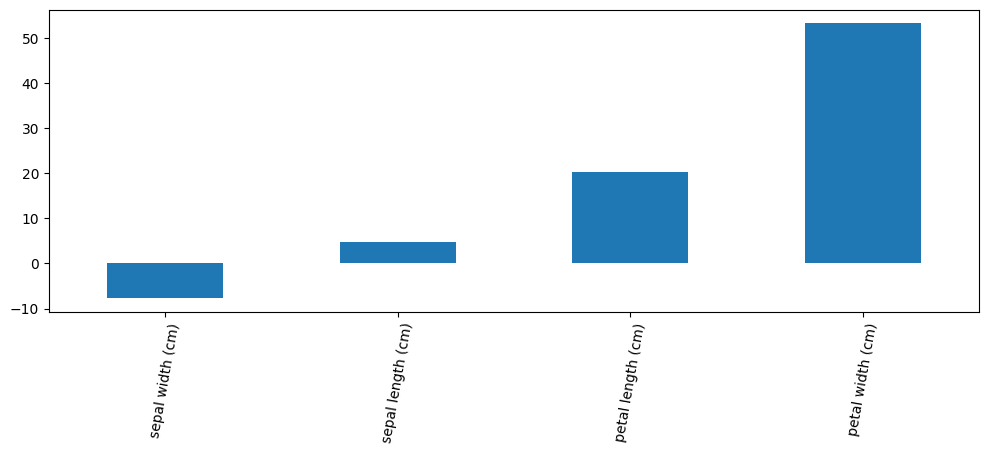

In [ ]:
plt.figure(figsize = (12, 4), dpi = 100)
ax = delta_sorted[:].plot.bar(rot = 80)

## Model Evaluation

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
y_hat_train = gnb.predict(x_train)
y_hat_test = gnb.predict(x_test)

In [ ]:
print('Performance on Training Data')
print('  + accuracy: %.2f' % accuracy_score(y_train, y_hat_train))
print('Performance on Testing Data')
print('  + accuracy: %.2f' % accuracy_score(y_test, y_hat_test))

Performance on Training Data
  + accuracy: 0.97
Performance on Testing Data
  + accuracy: 0.93


In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
confusion_matrix(y_test, y_hat_test)

array([[11,  0,  0],
       [ 0, 16,  2],
       [ 0,  1, 15]])

# Hierarchical Linear Model

## Setup

In [1]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pymc3 as pm
import theano
import xarray as xr

print(f"Running on PyMC3 v{pm.__version__}")

Running on PyMC3 v3.11.4


In [ ]:
SEED = 42
np.random.seed(SEED)

In [ ]:
data = pd.read_csv('mlmldata.csv')

In [ ]:
data.schid.unique()

array([ 7472,  7829,  7930, 24725, 25456, 25642, 62821, 68448, 68493,
       72292])

In [ ]:
data.math

0      48
1      48
2      53
3      42
4      43
       ..
255    43
256    45
257    47
258    34
259    53
Name: math, Length: 260, dtype: int64

In [ ]:
data[['schid','homework','math']]

schid  homework  math
0     7472         1    48
1     7472         0    48
2     7472         0    53
3     7472         1    42
4     7472         2    43
..     ...       ...   ...
255  72292         2    43
256  72292         0    45
257  72292         1    47
258  72292         1    34
259  72292         1    53

[260 rows x 3 columns]

In [ ]:
data["math"] = data["math"].astype(theano.config.floatX)

In [ ]:
%config InlineBackend.figure_format = 'retina'
az.style.use("arviz-darkgrid")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import itertools

plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (8,5)
# Helpers

# plot line with slope and intercept
def abline(slope, intercept, ax=None, **kwargs):
    """Plot a line from slope and intercept"""
    axes = ax if ax else plt.gca()
    x_vals = np.array([0,7])
    y_vals = intercept + slope * x_vals
    axes.plot(x_vals, y_vals,  **kwargs)
    
# facet with defaults specific to this data
def facetgrid(func):
    """ func is a function that takes the group df, matplotlib axes, group ID
        func must plot using the axes
    """
    fig, ax = plt.subplots(2, 5, figsize=(16,7), 
                           sharex=True, sharey=True,
                            constrained_layout=True)
    
    groups = data.groupby('schid')  # 10 schools
    grp_ids = list(groups.groups)
    
    for i, j in itertools.product(range(2), range(5)):
        grp_id = grp_ids[i * 5 + j]
        func(groups.get_group(grp_id), ax[i,j], grp_id)
        ax[i,j].set_title('schid : ' + str(grp_id), fontweight='bold')
        
    fig.text(0.5, -0.03, 'homework', ha='center', fontsize=16)
    fig.text(-0.02, 0.5, 'math', va='center', rotation='vertical', fontsize=16)
    handles, labels = ax[-1,-1].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(0.98, 0.98))
    
# colors from BMH style
red = '#A60628'
blue = '#0072B2'
green = '#467821'
violet = '#7A68A6'
orange = '#D55E00'
pink = '#CC79A7'

Text(0, 0.5, 'math')

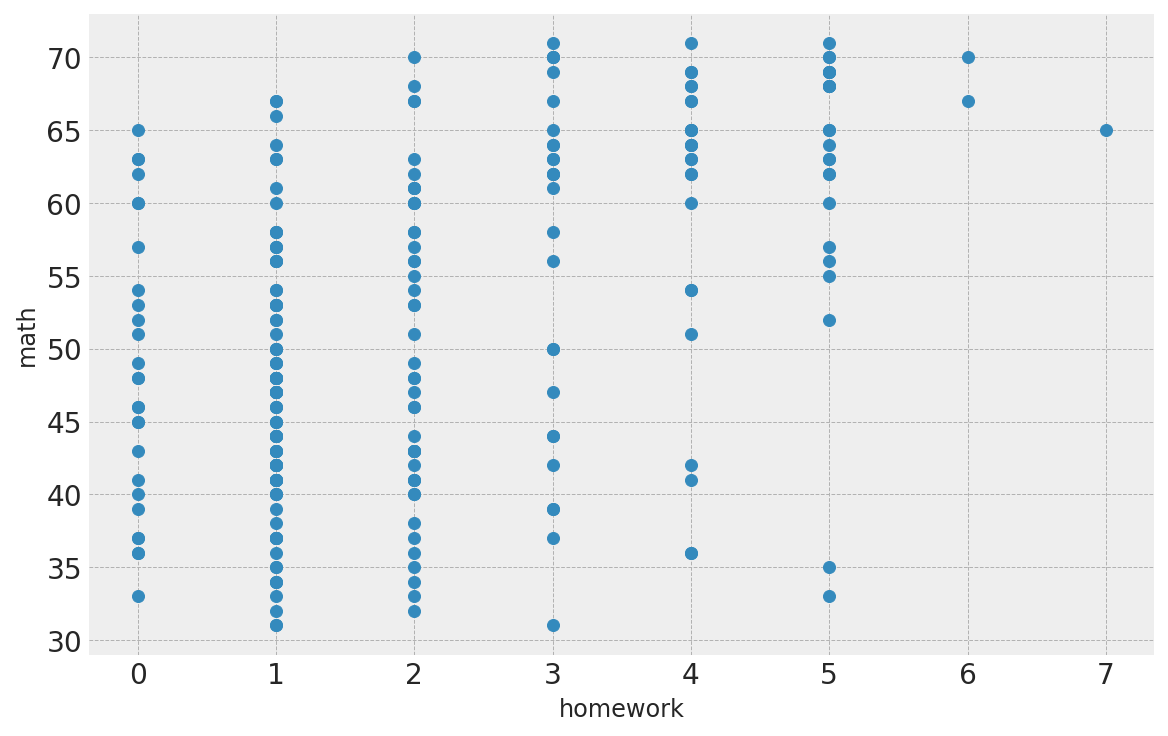

In [ ]:
def plot_data(df, ax=None, grp_id=None, **kwargs):
    if not ax:
        fig, ax = plt.subplots()
    ax.scatter(df['homework'], df['math'], **kwargs)
    return ax
    
ax = plot_data(data)
ax.set_xlabel('homework')
ax.set_ylabel('math')

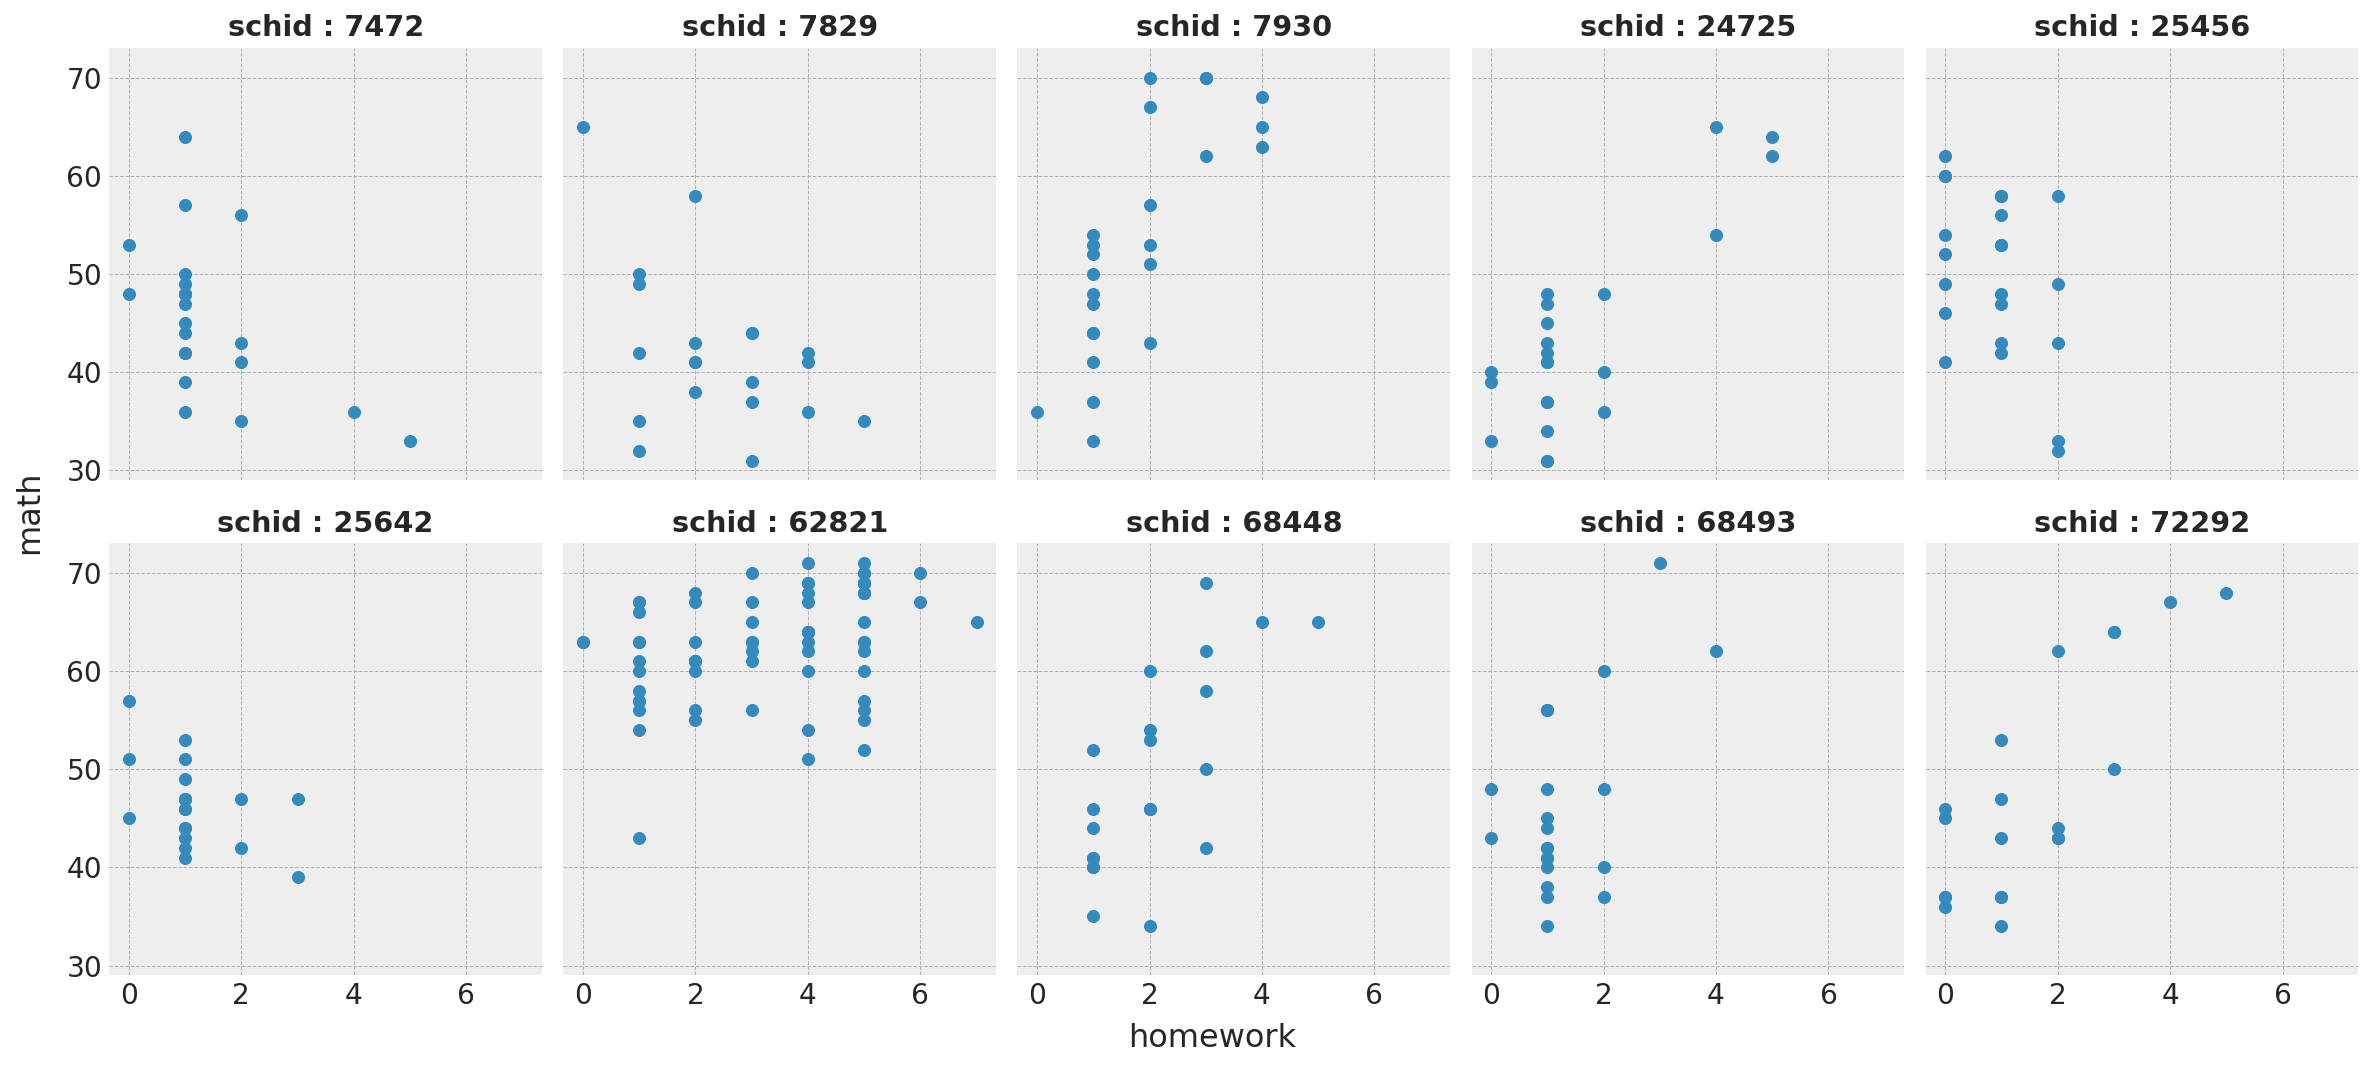

In [ ]:
facetgrid(plot_data)

## Pooled Model

In [ ]:
from statsmodels.formula.api import ols

unpooled_model = ols('math ~ homework', data).fit()
unpooled_est = unpooled_model.params

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


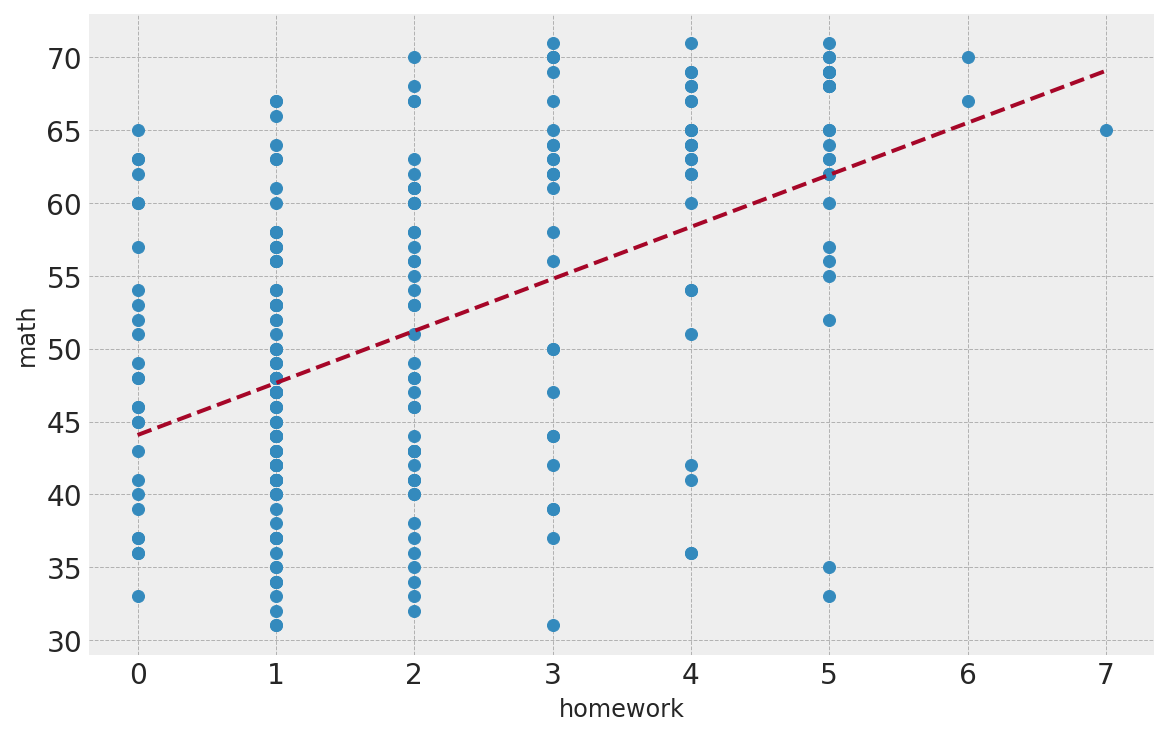

In [ ]:
m = unpooled_est['homework']
c = unpooled_est['Intercept']

plt.scatter(data['homework'], data['math'])
plt.xlabel('homework')
plt.ylabel('math')

abline(m, c, linestyle='--', color=red)

## Unpooled Model

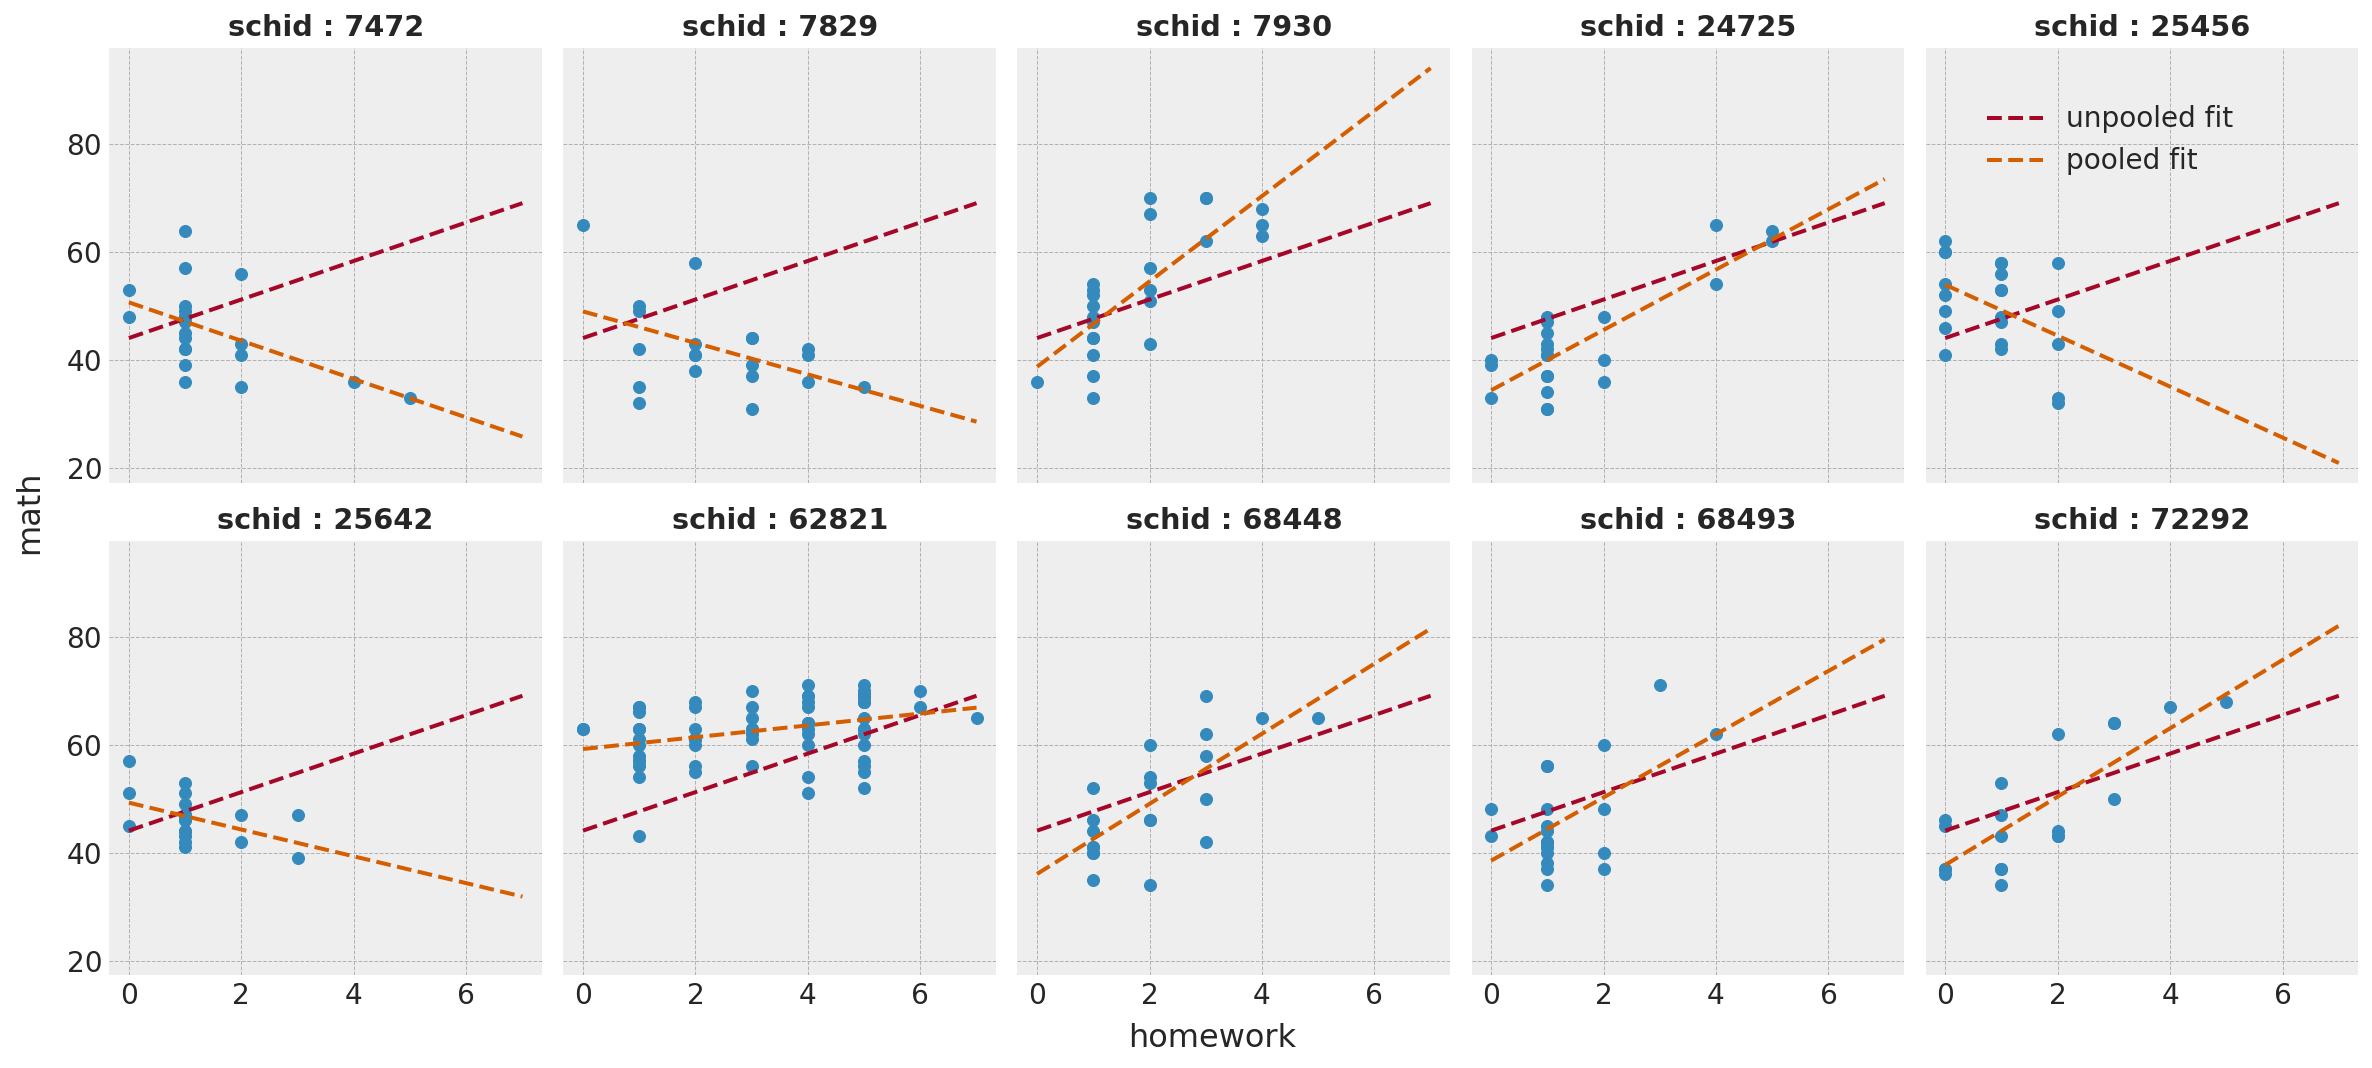

In [ ]:
pooled_est = {}  # scid : (m, c)

def pooled_model(df, ax, grp_id):
    pooled_model = ols('math ~ homework', df).fit()
    pooled_params = pooled_model.params
    
    mp = pooled_params['homework']
    cp = pooled_params['Intercept']
    
    # save estimates of the group
    pooled_est[grp_id] = (mp, cp)
    
    # plot along with unpooled regression line
    plot_data(df, ax, grp_id)
    abline(m, c, ax, linestyle='--', color=red, label='unpooled fit')
    abline(mp, cp, ax, linestyle='--', color=orange, label='pooled fit')
    
facetgrid(pooled_model)

There is a significant variation in the relationship across different groups. Clearly, a single model will not be able to capture it.

## Partial pooling (Bayesian HLM)

We will perform bayesian hierarchical modeling using PyMC3. We will construct hyper priors on our group level parameters to allow the model to share student level coefficients among the groups withing the data. The model can be represented as:

$$ y_i = \alpha_{ji} + \beta_{ji}x_i + \epsilon_i $$

or in probabilistic notation:

$$ y \sim N(\alpha_{j} + \beta_{j}x, \epsilon) $$

where j is the school index.

For this model I will use a random slope and intercept, meaning both of them will have an hyper prior on them. 

Reference: 

https://towardsdatascience.com/introduction-to-hierarchical-modeling-a5c7b2ebb1ca

https://towardsdatascience.com/estimating-probabilities-with-bayesian-modeling-in-python-7144be007815

https://towardsdatascience.com/hands-on-bayesian-statistics-with-python-pymc3-arviz-499db9a59501

In [ ]:
schids, school = pd.factorize(data.schid)

In [ ]:
schids

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8,
       8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9])

In [ ]:
school

Int64Index([7472, 7829, 7930, 24725, 25456, 25642, 62821, 68448, 68493, 72292], dtype='int64')

In [ ]:
coords = {
    "school": school,
    "sch_id": np.arange(len(schids)),
}

In [ ]:
coords

{'sch_id': array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175

### Non-Informative Priors (Uniform Distribution)

In [ ]:
with pm.Model(coords=coords) as model:

    schids = pm.Data("schids", schids, dims="sch_id")
    # Hyperpriors
    fixed_A = pm.Uniform("prior_fixed_A", 30,60)
    random_A = pm.Uniform('prior_random_A', 2,12)
    
    fixed_B = pm.Uniform('prior_fixed_B', 0, 5)
    random_B = pm.Uniform('prior_random_B', 0, 10)
    
    # Intercept
    Intercept = pm.Normal('A', mu=fixed_A, sigma=random_A, dims="school")
    # Slope
    Homework = pm.Normal('B', mu=fixed_B, sigma=random_B, dims="school")
    
    # Model error
    eps = pm.HalfCauchy('eps', 5)
    
    y_hat = Intercept[schids] + Homework[schids] * data.homework.values
    
    # Likelihood
    y_like = pm.Normal('y_likelihood', mu=y_hat, sigma=eps, observed=data.math, dims="sch_id")

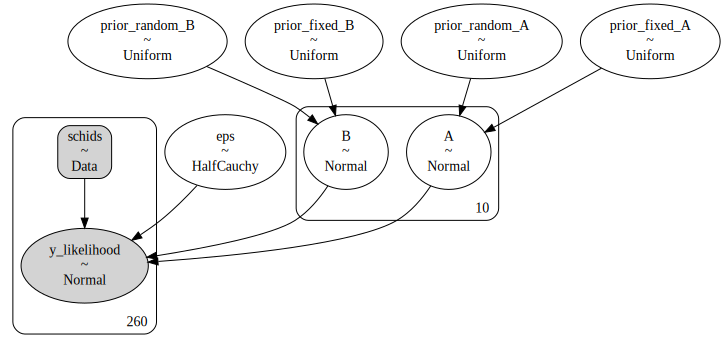

In [ ]:
pm.model_to_graphviz(model)

In [ ]:
with model:
    trace = pm.sample(2000, tune=2000, target_accept=0.9, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [eps, B, A, prior_random_B, prior_fixed_B, prior_random_A, prior_fixed_A]


Sampling 2 chains for 2_000 tune and 2_000 draw iterations (4_000 + 4_000 draws total) took 39 seconds.


In [ ]:
df_summary = pm.summary(trace)
df_summary

mean     sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
A[7472]         49.696  2.115  45.537  ...    3726.0    3203.0    1.0
A[7829]         47.857  2.820  42.560  ...    3381.0    2958.0    1.0
A[7930]         39.951  2.467  35.520  ...    3611.0    2818.0    1.0
A[24725]        35.302  2.061  31.498  ...    4309.0    3255.0    1.0
A[25456]        52.537  2.036  48.814  ...    3956.0    3056.0    1.0
A[25642]        48.172  2.406  43.960  ...    4368.0    3277.0    1.0
A[62821]        58.464  1.745  55.288  ...    3841.0    3235.0    1.0
A[68448]        37.704  2.899  32.092  ...    3887.0    3150.0    1.0
A[68493]        39.582  2.378  35.284  ...    4984.0    3314.0    1.0
A[72292]        38.536  2.103  34.743  ...    3692.0    2808.0    1.0
B[7472]         -2.957  1.192  -5.100  ...    3428.0    3209.0    1.0
B[7829]         -2.467  1.063  -4.476  ...    3476.0    3002.0    1.0
B[7930]          7.330  1.157   5.179  ...    3423.0    2624.0    1.0
B[24725]         5.221  0.934   3.389  ...    4552.0    2938.0    1.0
B[25456]        -3.396  1.753  -6.339  ...    3951.0    3083.0    1.0
B[25642]        -1.657  1.701  -4.811  ...    4328.0    3282.0    1.0
B[62821]         1.278  0.469   0.410  ...    3817.0    2871.0    1.0
B[68448]         5.817  1.217   3.459  ...    3998.0    2932.0    1.0
B[68493]         5.188  1.484   2.507  ...    4716.0    3022.0    1.0
B[72292]         5.951  1.008   3.936  ...    3914.0    3222.0    1.0
prior_fixed_A   44.822  2.783  39.319  ...    5360.0    2223.0    1.0
prior_random_A   8.379  1.715   5.498  ...    3221.0    2242.0    1.0
prior_fixed_B    2.215  1.180   0.021  ...    5456.0    2396.0    1.0
prior_random_B   4.964  1.311   2.866  ...    3130.0    2201.0    1.0
eps              6.594  0.300   6.065  ...    4486.0    2893.0    1.0

[25 rows x 9 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dd5391790>,
      dtype=object)

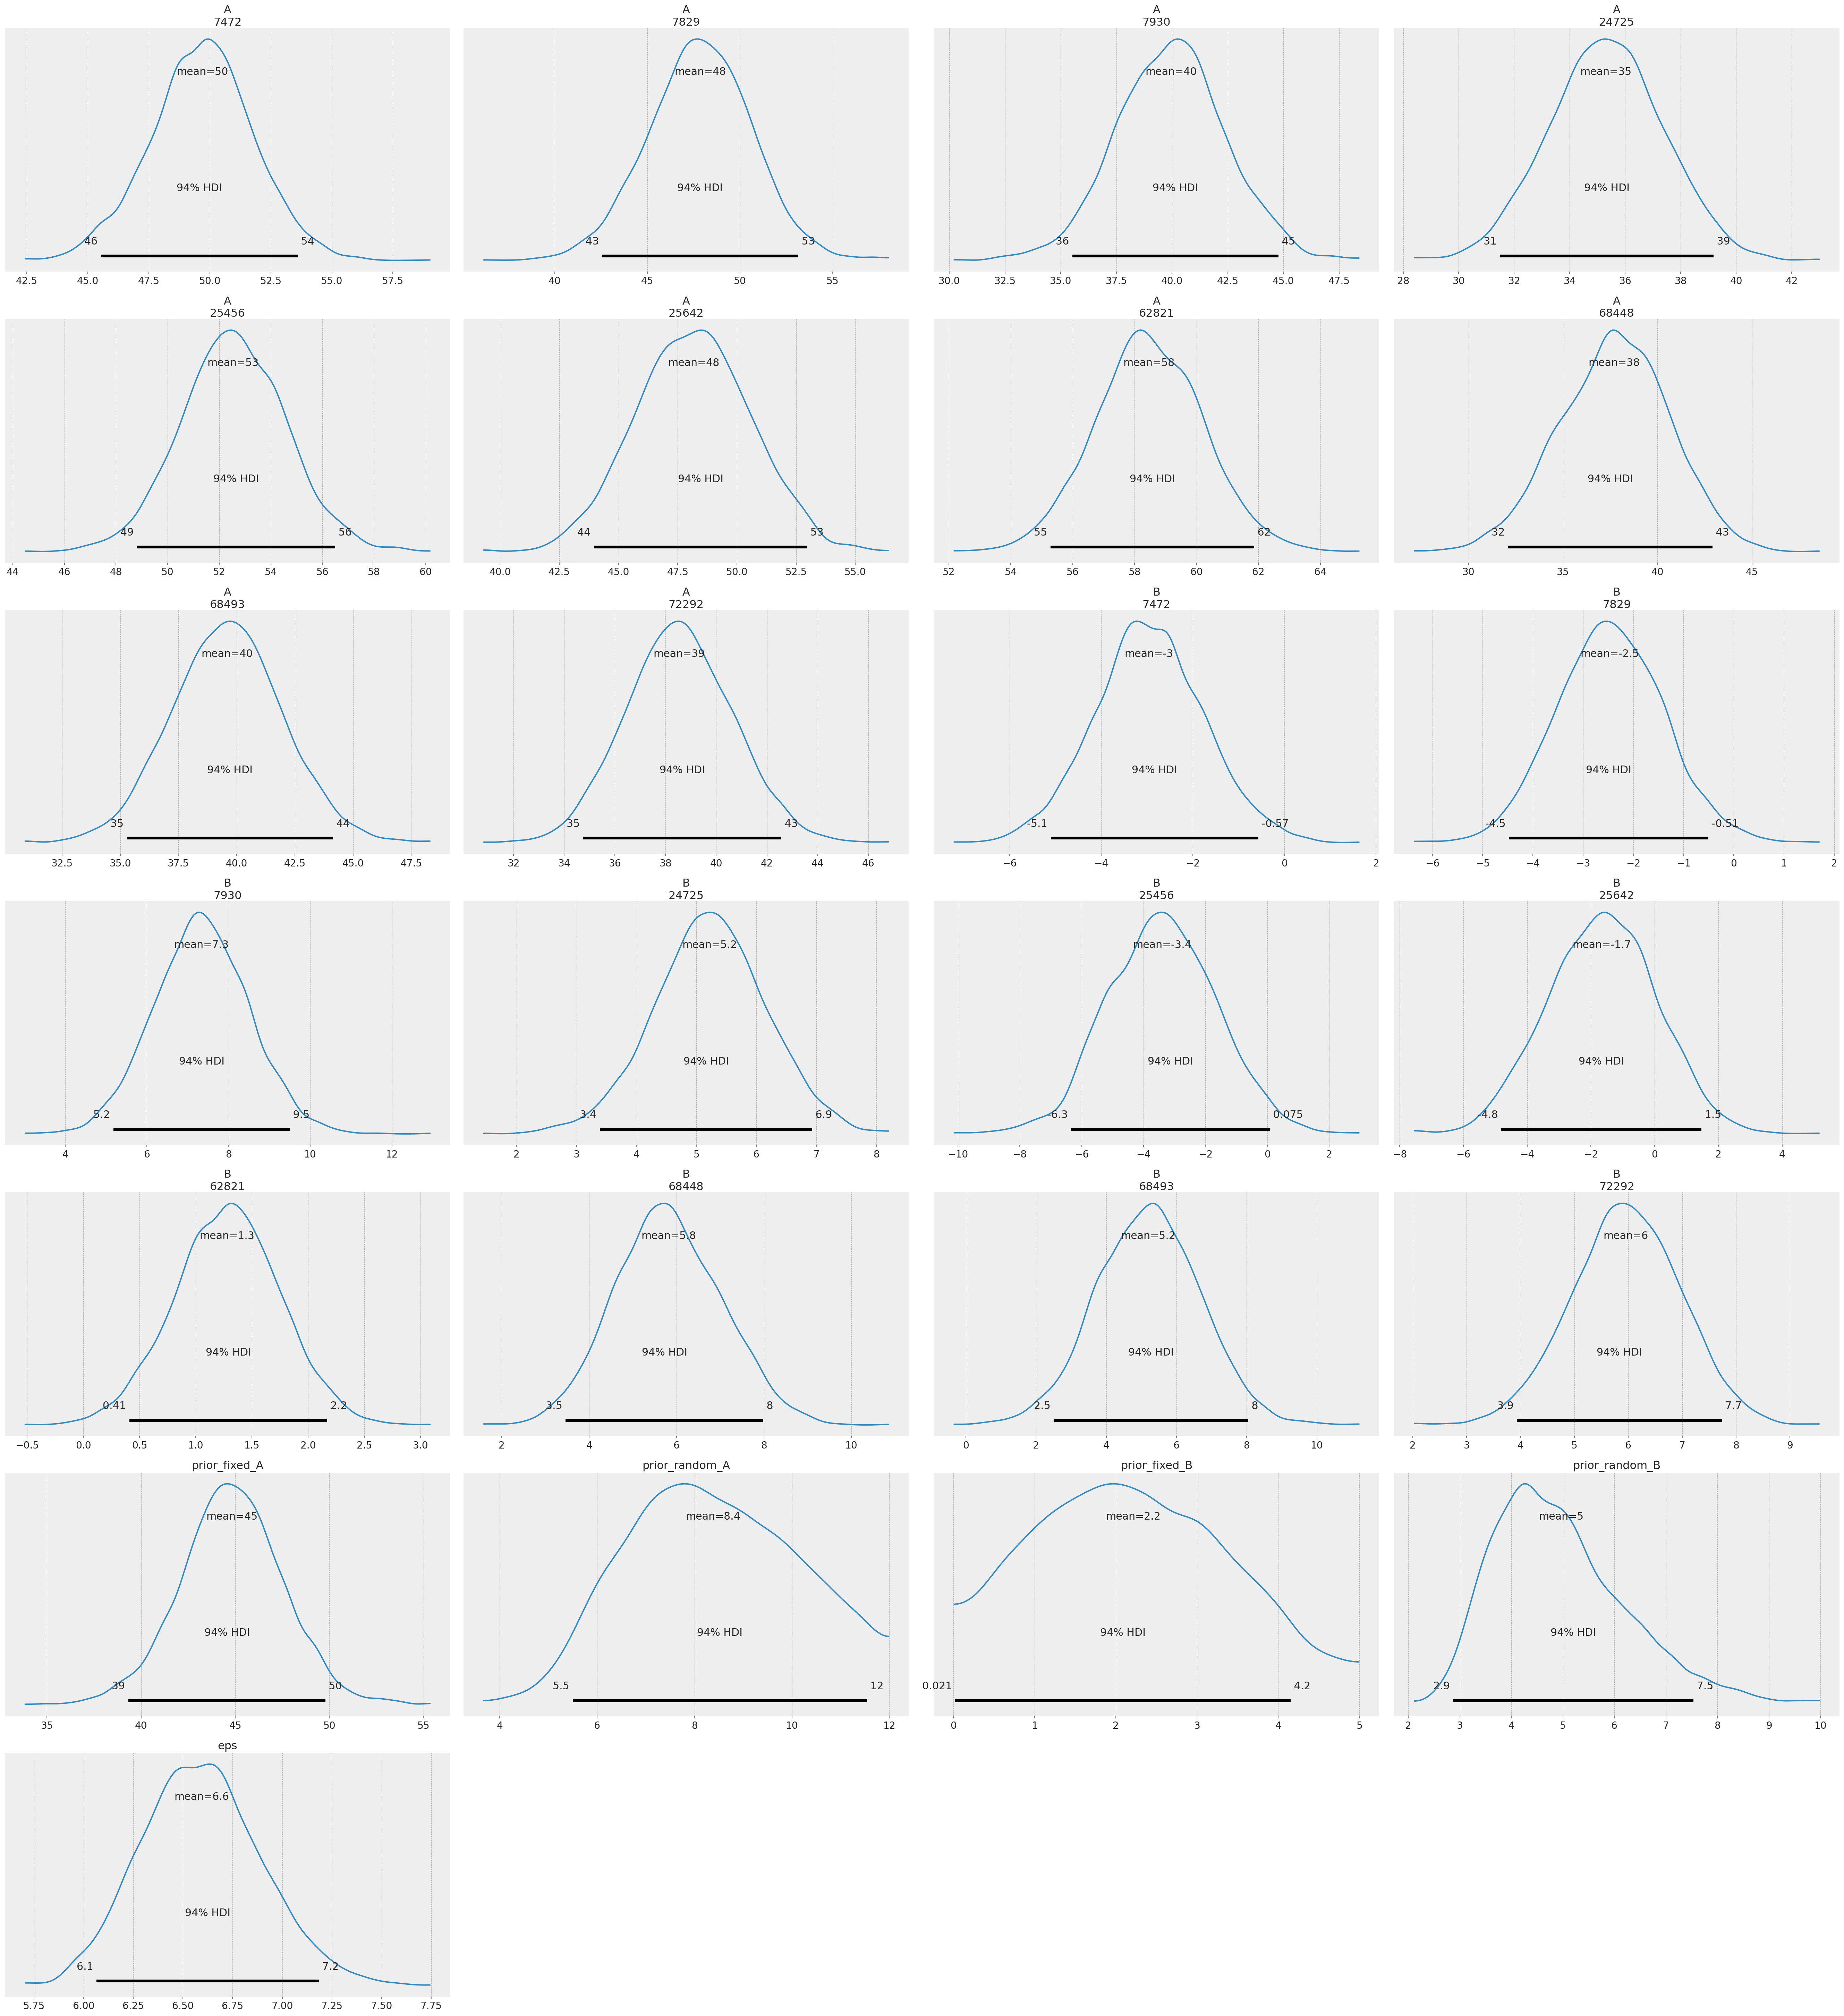

In [ ]:
pm.plot_posterior(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dde4e83d0>,
      dtype=object)

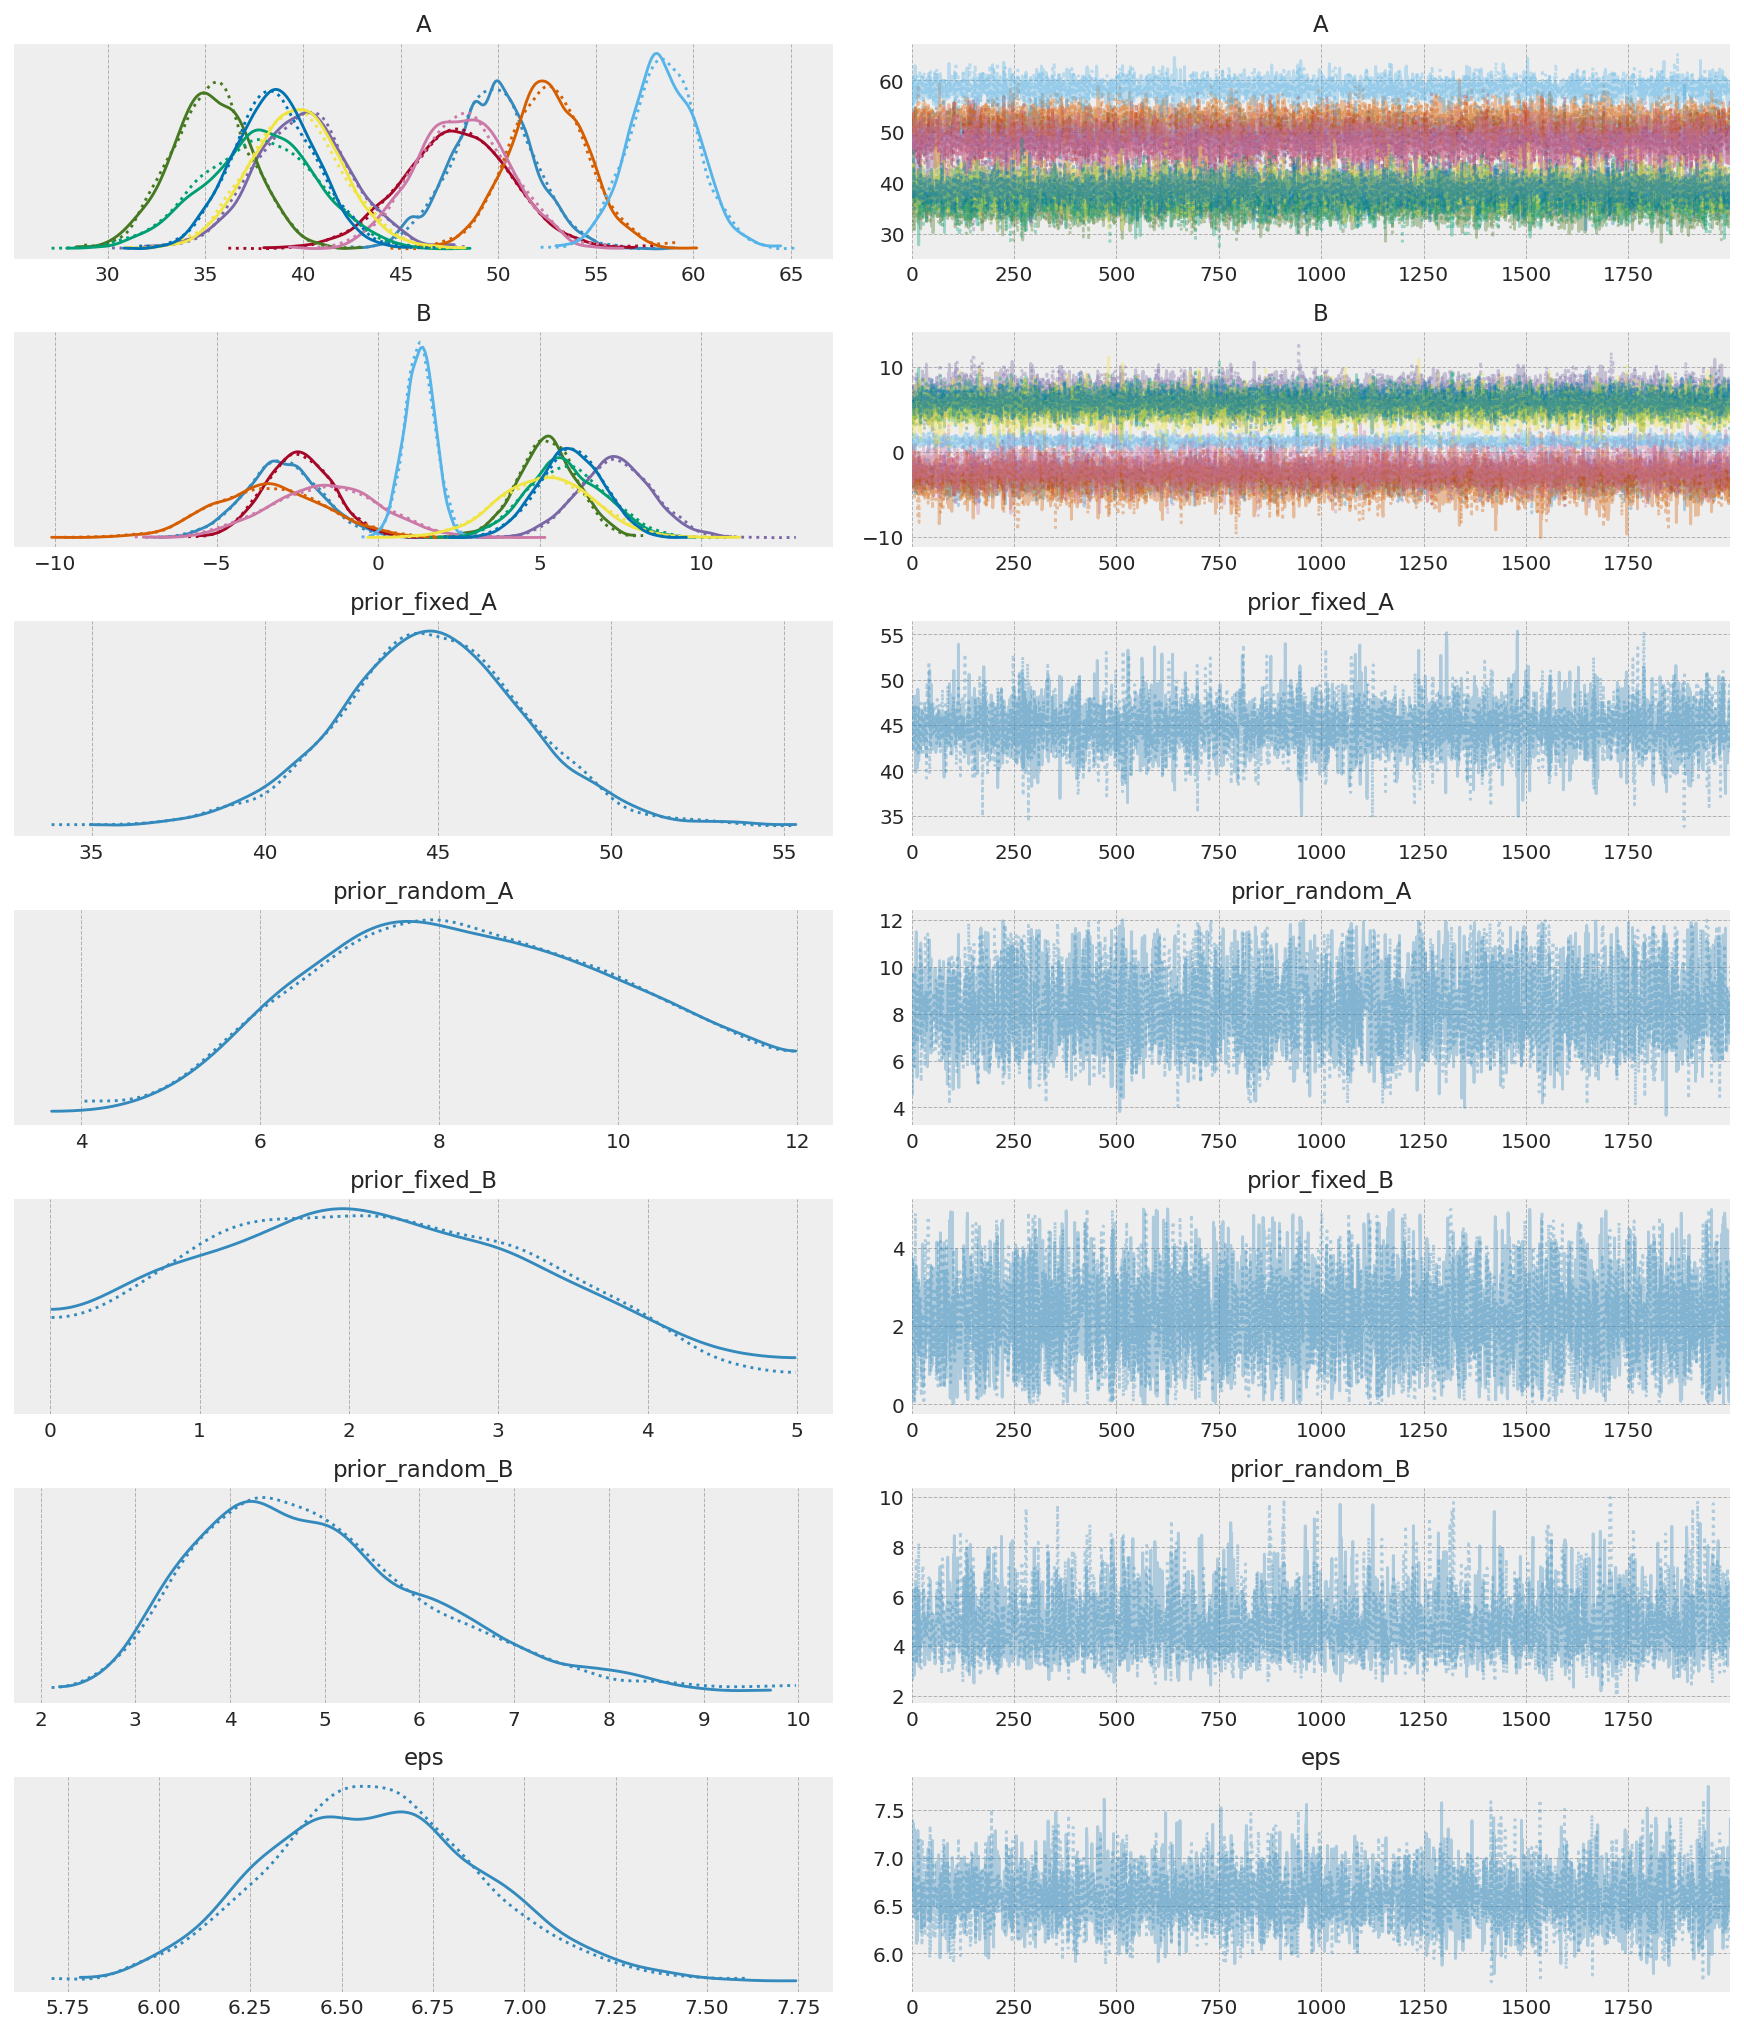

In [ ]:
az.plot_trace(trace)

### Normal Fixed Effect B (作爲對照)

In [ ]:
schids, school = pd.factorize(data.schid)

In [ ]:
coords = {
    "school": school,
    "sch_id": np.arange(len(schids)),
}

In [ ]:
with pm.Model(coords=coords) as model:

    schids = pm.Data("schids", schids, dims="sch_id")
    # Hyperpriors
    fixed_A = pm.Uniform("prior_fixed_A", 30,60)
    random_A = pm.Uniform('prior_random_A', 2,12)
    
    fixed_B = pm.Normal('prior_fixed_B', 5, 2) # 我相信"愛拼才會贏"
    random_B = pm.Uniform('prior_random_B', 0, 10)
    
    # Intercept
    Intercept = pm.Normal('A', mu=fixed_A, sigma=random_A, dims="school")
    # Slope
    Homework = pm.Normal('B', mu=fixed_B, sigma=random_B, dims="school")
    
    # Model error
    eps = pm.HalfCauchy('eps', 5)
    
    y_hat = Intercept[schids] + Homework[schids] * data.homework.values
    
    # Likelihood
    y_like = pm.Normal('y_likelihood', mu=y_hat, sigma=eps, observed=data.math, dims="sch_id")

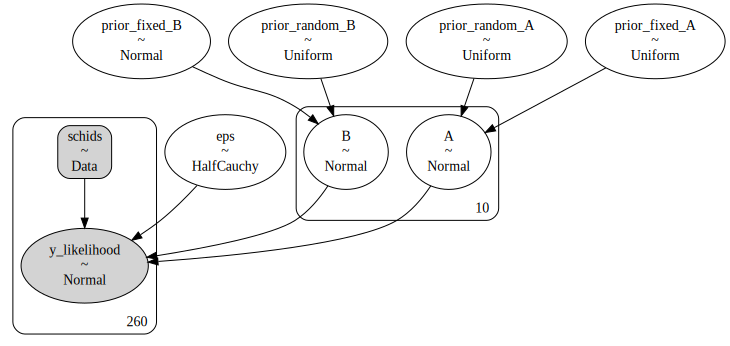

In [ ]:
pm.model_to_graphviz(model)

In [ ]:
with model:
    trace = pm.sample(20000, tune=2000, target_accept=0.9, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [eps, B, A, prior_random_B, prior_fixed_B, prior_random_A, prior_fixed_A]


Sampling 2 chains for 2_000 tune and 20_000 draw iterations (4_000 + 40_000 draws total) took 200 seconds.


In [ ]:
df_summary = pm.summary(trace)
df_summary

mean     sd  hdi_3%  ...  ess_bulk  ess_tail  r_hat
prior_fixed_B    3.234  1.317   0.787  ...   57879.0   27929.0    1.0
A[7472]         49.704  2.143  45.709  ...   35300.0   30570.0    1.0
A[7829]         47.767  2.882  42.439  ...   34622.0   30353.0    1.0
A[7930]         39.818  2.460  35.151  ...   38980.0   31309.0    1.0
A[24725]        35.232  2.076  31.384  ...   41326.0   32880.0    1.0
A[25456]        52.524  2.047  48.764  ...   44938.0   32441.0    1.0
A[25642]        48.070  2.420  43.486  ...   42675.0   31716.0    1.0
A[62821]        58.472  1.734  55.253  ...   30804.0   29137.0    1.0
A[68448]        37.550  2.873  32.200  ...   36292.0   29943.0    1.0
A[68493]        39.441  2.441  34.814  ...   38672.0   30816.0    1.0
A[72292]        38.434  2.171  34.485  ...   39430.0   32126.0    1.0
B[7472]         -2.950  1.217  -5.228  ...   35303.0   30000.0    1.0
B[7829]         -2.432  1.088  -4.413  ...   34351.0   30426.0    1.0
B[7930]          7.407  1.153   5.220  ...   39037.0   32662.0    1.0
B[24725]         5.264  0.946   3.496  ...   40768.0   31620.0    1.0
B[25456]        -3.354  1.777  -6.640  ...   43796.0   30676.0    1.0
B[25642]        -1.550  1.729  -4.880  ...   43673.0   32970.0    1.0
B[62821]         1.277  0.467   0.420  ...   31119.0   29427.0    1.0
B[68448]         5.889  1.219   3.589  ...   36588.0   29446.0    1.0
B[68493]         5.305  1.522   2.492  ...   38515.0   30477.0    1.0
B[72292]         6.013  1.028   4.071  ...   39227.0   32192.0    1.0
prior_fixed_A   44.704  2.793  39.422  ...   45078.0   27140.0    1.0
prior_random_A   8.473  1.690   5.653  ...   30002.0   21250.0    1.0
prior_random_B   5.196  1.431   2.784  ...   25532.0   17248.0    1.0
eps              6.598  0.302   6.044  ...   60842.0   29855.0    1.0

[25 rows x 9 columns]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6648d3ef50>,
      dtype=object)

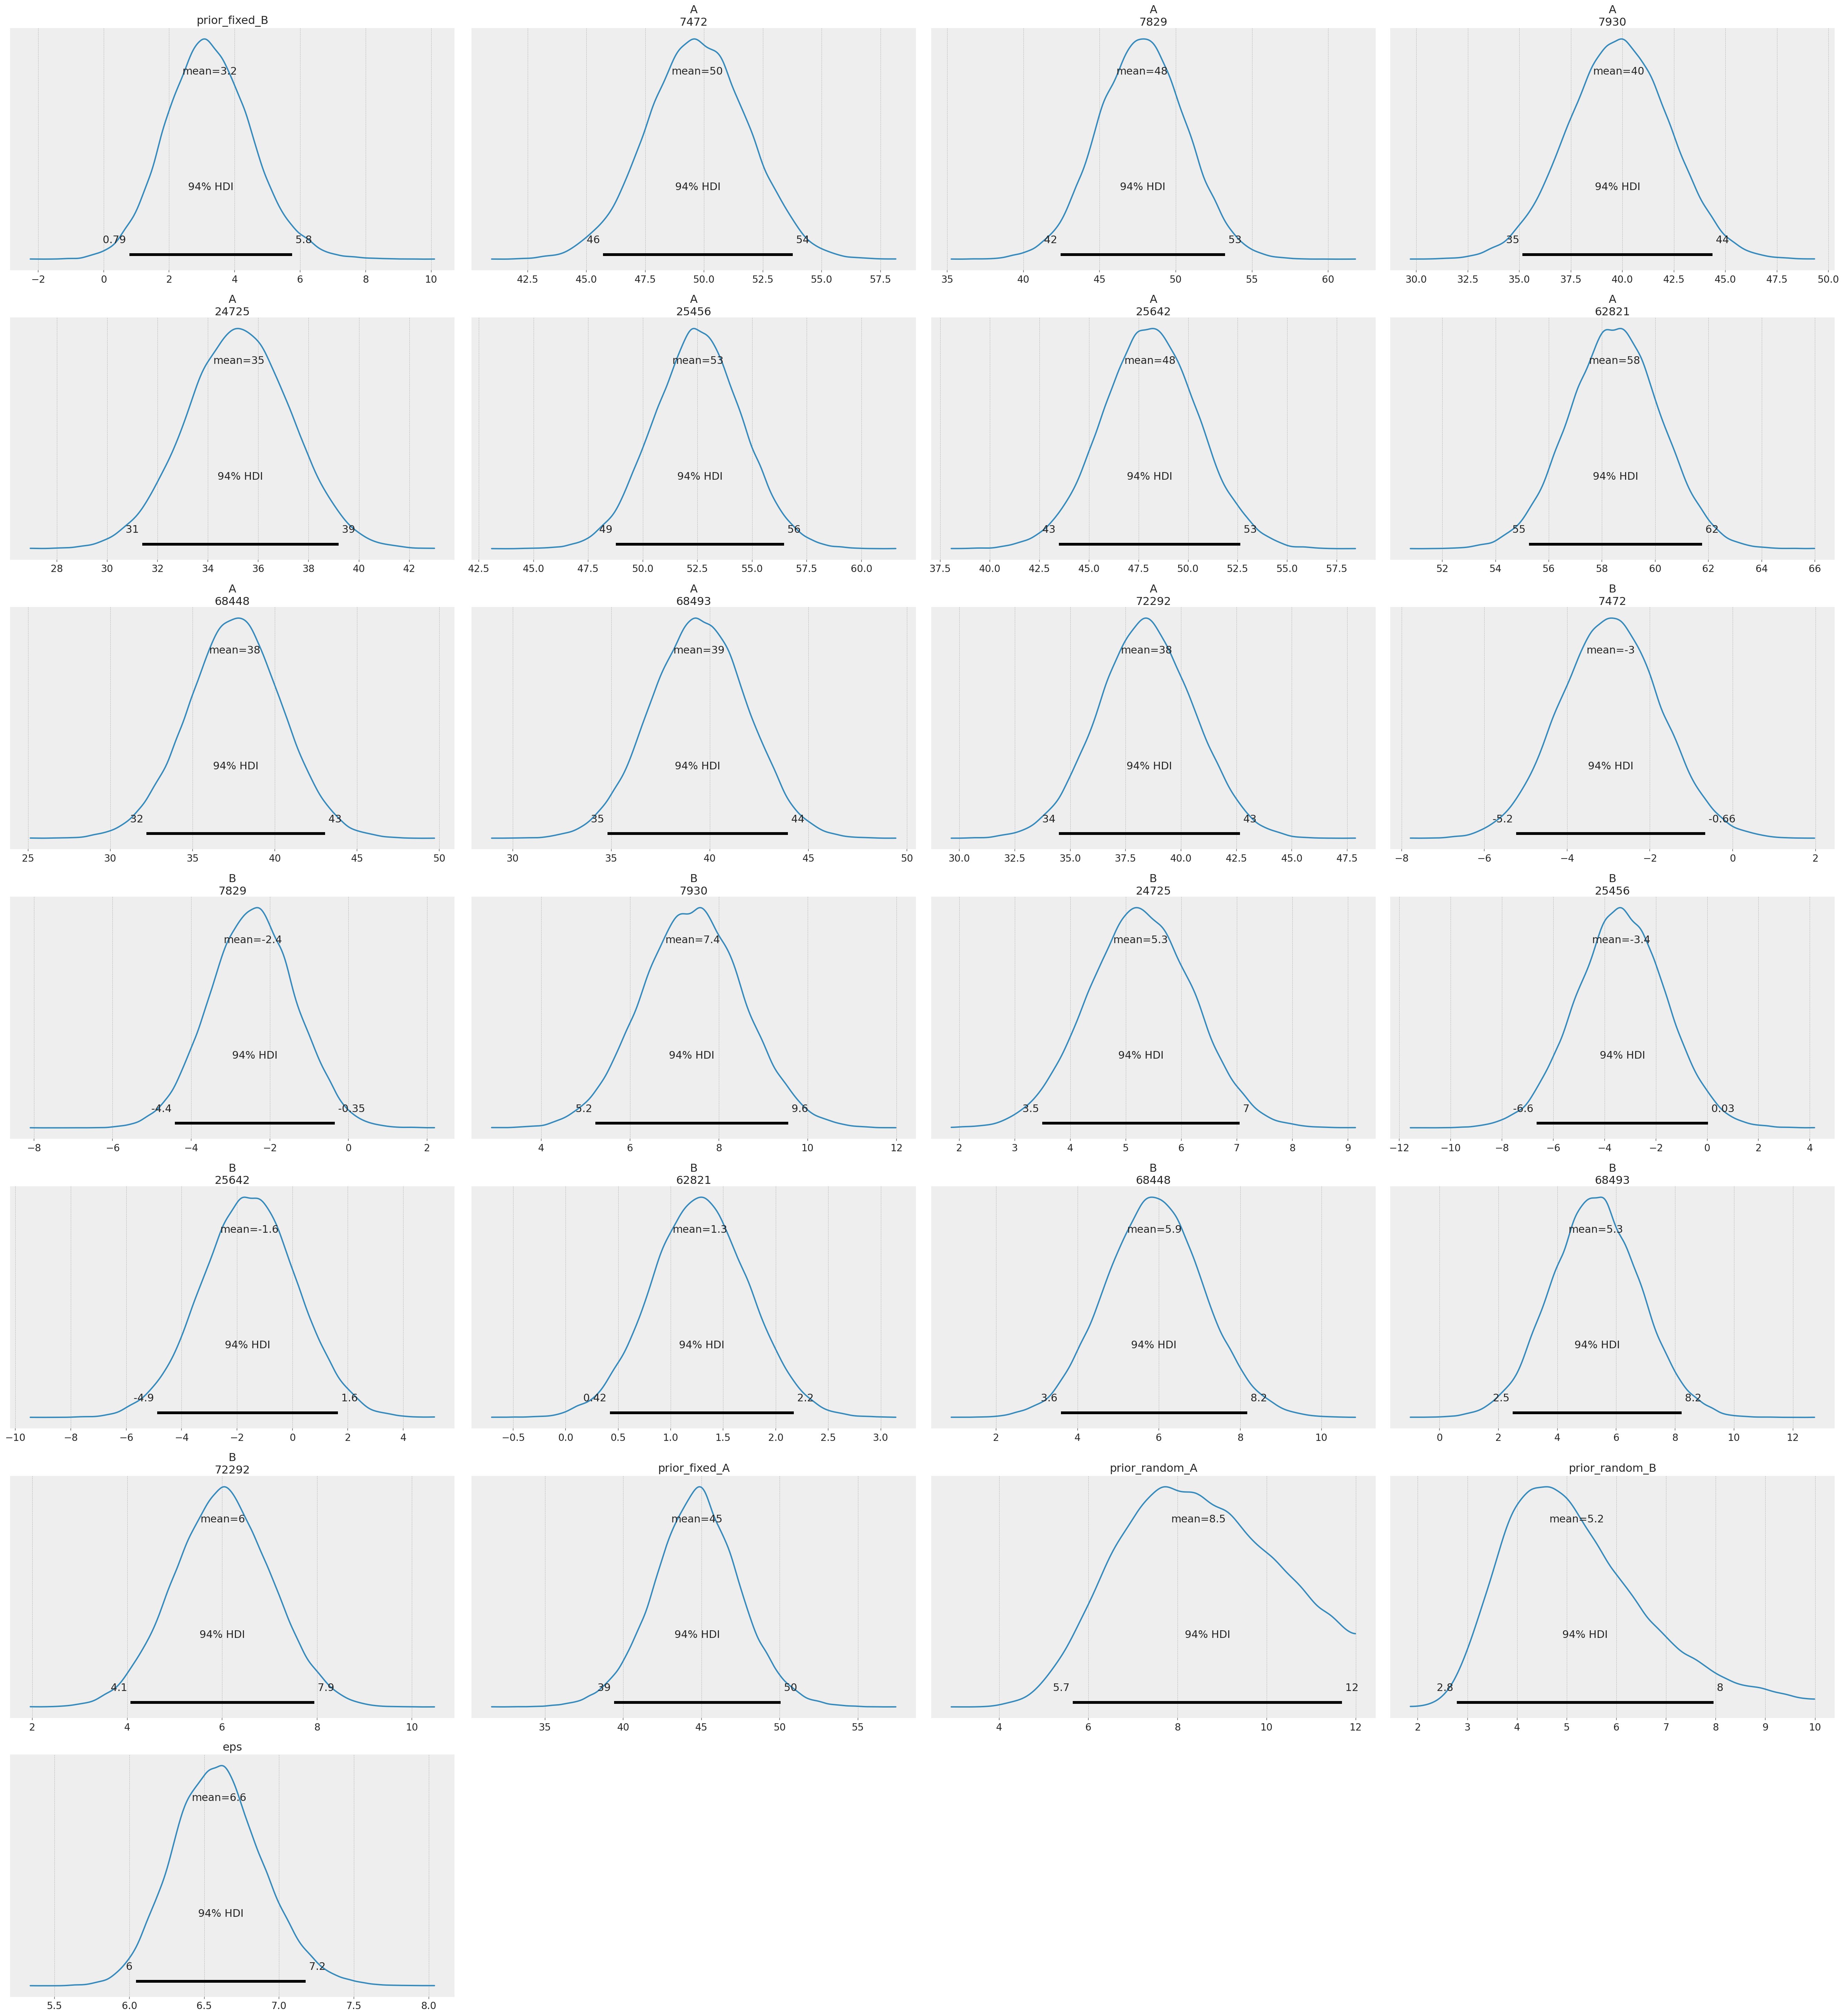

In [ ]:
pm.plot_posterior(trace)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f664addcbd0>,
      dtype=object)

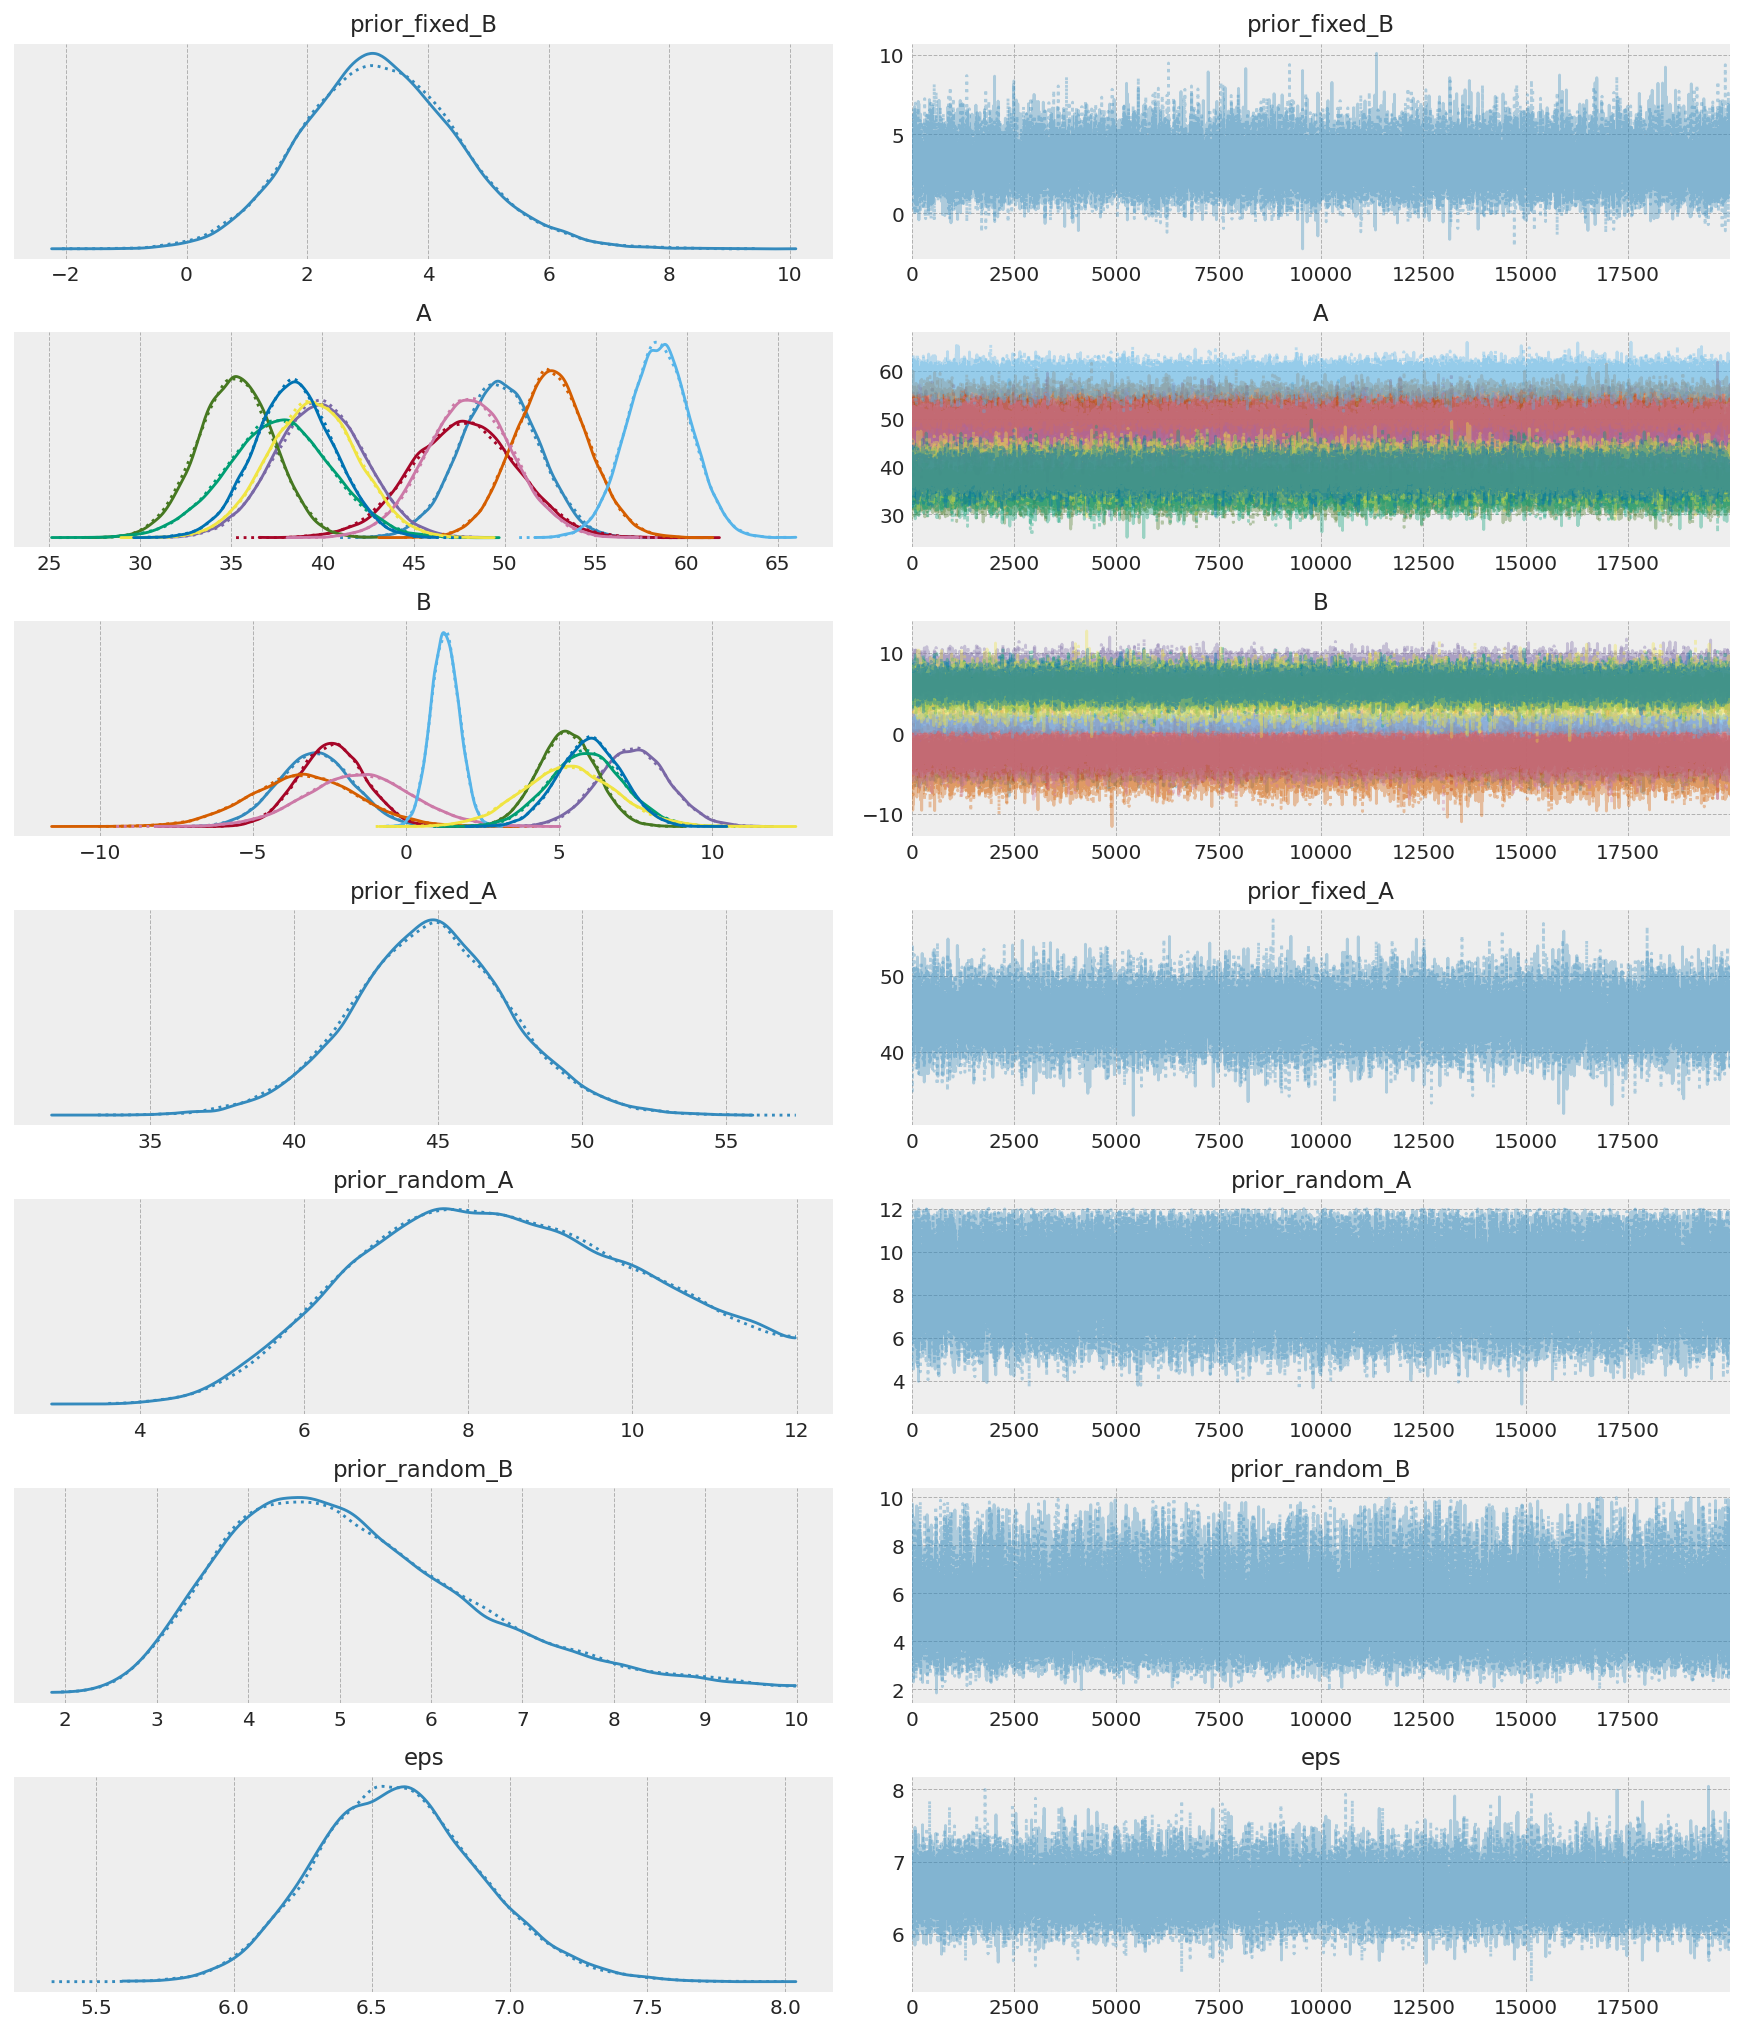

In [ ]:
az.plot_trace(trace)

### Full Informative Priors

In [ ]:
schids, school = pd.factorize(data.schid)

In [ ]:
coords = {
    "school": school,
    "sch_id": np.arange(len(schids)),
}

In [ ]:
with pm.Model(coords=coords) as model:

    schids = pm.Data("schids", schids, dims="sch_id")
    # Hyperpriors
    fixed_A = pm.Normal('prior_fixed_A', 20, 8)
    random_A  = pm.HalfNormal('prior_random_A', 15)
    
    fixed_B = pm.Normal('prior_fixed_B', 8, 4)
    random_B = pm.HalfNormal('prior_random_B', 2)
    
    # Intercept
    Intercept = pm.Normal('A', mu=fixed_A, sigma=random_A, dims="school")
    # Slope
    Homework = pm.Normal('B', mu=fixed_B, sigma=random_B, dims="school")
    
    # Model error
    eps = pm.HalfCauchy('eps', 5)
    
    y_hat = Intercept[schids] + Homework[schids] * data.homework.values
    
    # Likelihood
    y_like = pm.Normal('y_likelihood', mu=y_hat, sigma=eps, observed=data.math, dims="sch_id")

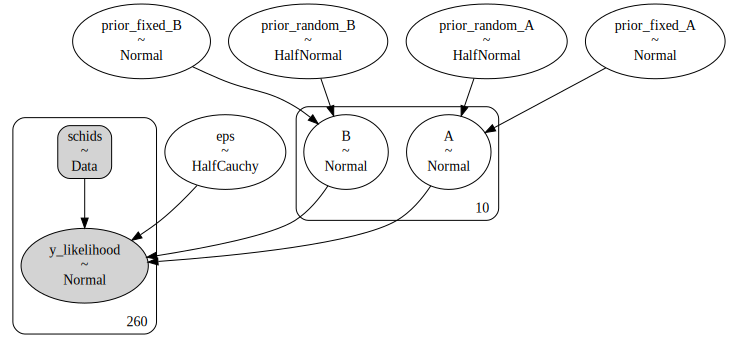

In [ ]:
pm.model_to_graphviz(model)

# It's your turn !

In [ ]:
schids, school = pd.factorize(data.schid)

In [ ]:
coords = {
    "school": school,
    "sch_id": np.arange(len(schids)),
}

In [ ]:
with pm.Model(coords=coords) as model:

    schids = pm.Data("schids", schids, dims="sch_id")
  
    # 將下列四個Hyperpriors的 分佈 與 其分佈參數 根據你的想象做修改，
    # 並就其結果與 Non-Informative Priors 設定的結果 對比，告訴我一個連貫的故事
    # 你在 Hyperpriors 的設定如何影響你的結果，將你的結果及説明貼在 word檔 繳交。
    # 這題有做+2%，詮釋合理再+1%

    # Hyperpriors
    #fixed_A = pm.Uniform("prior_fixed_A", 30,60)
    #random_A = pm.Uniform('prior_random_A', 2,12)
    
    #fixed_B = pm.Uniform('prior_fixed_B', 0, 5)
    #random_B = pm.Uniform('prior_random_B', 0, 10)
    
    # Intercept
    Intercept = pm.Normal('A', mu=fixed_A, sigma=random_A, dims="school")
    # Slope
    Homework = pm.Normal('B', mu=fixed_B, sigma=random_B, dims="school")
    
    # Model error
    eps = pm.HalfCauchy('eps', 5)
    
    y_hat = Intercept[schids] + Homework[schids] * data.homework.values
    
    # Likelihood
    y_like = pm.Normal('y_likelihood', mu=y_hat, sigma=eps, observed=data.math, dims="sch_id")

In [ ]:
pm.model_to_graphviz(model)

In [ ]:
with model:
    trace = pm.sample(20000, tune=2000, target_accept=0.9, return_inferencedata=True)

In [ ]:
df_summary = pm.summary(trace)
df_summary

In [ ]:
pm.plot_posterior(trace)

In [ ]:
az.plot_trace(trace)